In [ ]:
#importing libraries

# Import libraries here
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
df

### Top 5 Values

In [89]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
#explore the data
print("df shape:", df.shape)

df shape: (10000, 14)


In [92]:
missing_values = df.isna().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [93]:
# Accessing data types of DataFrame columns
column_data_types = df.dtypes
column_data_types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [94]:
# Check for duplicate rows in a DataFrame
duplicate_rows = df[df.duplicated()].count()
duplicate_rows

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [95]:
# Get summary statistics of numeric columns in the DataFrame
summary_stats = df.describe(include='all')
summary_stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


## Data Cleaning

In [96]:
# Convert all columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [97]:
# Renaming DataFrame columns for Improved Clarity
df.rename(columns = {'rownumber' : 'row_number',
                      'customerid' : 'customer_id',
                      'creditscore' : 'credit_score',
                      'numofproducts': 'num_of_products',
                      'hascrcard': 'has_credit_card',
                      'isactivemember' : 'is_active_member',
                      'estimatedsalary': 'estimated_salary'}, inplace = True)

In [98]:
df.head(2)

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [99]:
# Dropping Unnecessary Columns for Improved Prediction
df = df.drop(columns = ["row_number", "customer_id"])

## Exploratory Data Analysis

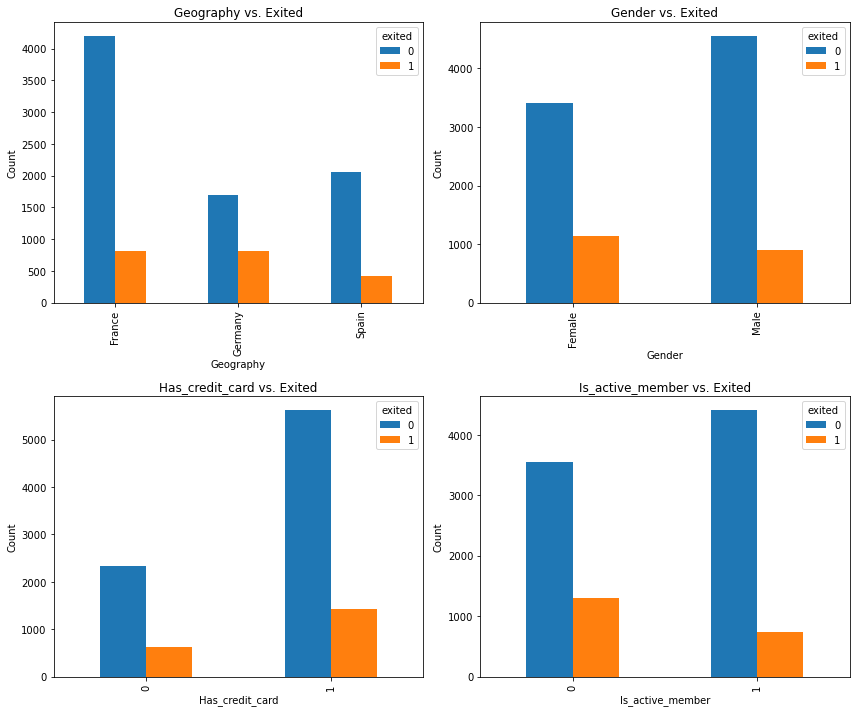

In [110]:
# List of categorical columns
categoriacl_columns = ["geography", "gender", "has_credit_card", "is_active_member"]


# Creating asubplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Creating individual bar charts for categorical columns
for i, col in enumerate(categorical_columns):
    
    # Group the data by the categorical column and "exited" column and get the counts
    data_grouped = df.groupby([col, 'exited']).size().unstack()
    
    # Create a bar chart for the current categorical column
    ax = data_grouped.plot(kind='bar', ax=axes[i // 2, i % 2])
    
    # Set the title, x-axis label, and y-axis label
    ax.set_title(f"{col.capitalize()} vs. Exited")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Count")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()